In [147]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sb

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [148]:
x,y = make_blobs(n_samples=100,n_features=10)

In [149]:
x

array([[ -7.91654488,  10.19363432,  -4.55431556,  -8.3986489 ,
         -3.08350315,  -3.0006523 ,   3.3890976 ,  -1.06428765,
          8.02787341,   0.80854323],
       [ -3.42814921,  -8.87345607,   8.70949657,  -5.70646702,
         -1.55687805,  -6.35196982,  -3.66508611, -10.30873059,
          7.83807594,  -7.61514592],
       [ -9.50521639,   9.51434191,  -4.29470699,  -6.73391705,
         -0.61636256,  -2.20786722,   1.89144662,  -1.905197  ,
          6.53491044,   2.4716358 ],
       [ -9.32874896,   9.54585446,  -2.64395662,  -8.43836678,
         -0.59720079,  -3.56053126,   1.73024875,  -1.76154759,
          7.74544844,   2.28675501],
       [ -2.76709737,  -6.74734148,   8.40992209,  -5.80109205,
         -0.38763933,  -6.00083697,  -3.53496479,  -8.99159774,
          9.0970849 ,  -7.68723572],
       [  4.9341507 ,  -8.26162631,  -2.58959544,  -3.24037729,
         -9.5422232 ,   2.17992635,   7.54799318,  -6.43662827,
         -5.82456495,   6.14605412],
       [ -

In [150]:
y

array([0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1,
       2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2,
       1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0])

In [151]:
pca = PCA(n_components=4)
print('before',x.shape)

before (100, 10)


In [152]:
pca.fit(x)

PCA(n_components=4)

In [153]:
x=pca.transform(x)
# x=pca.fit_transform(x)

In [154]:
print('after',x.shape)

after (100, 4)


In [155]:
pca.explained_variance_ratio_

array([0.54405859, 0.42777341, 0.00495095, 0.00482944])

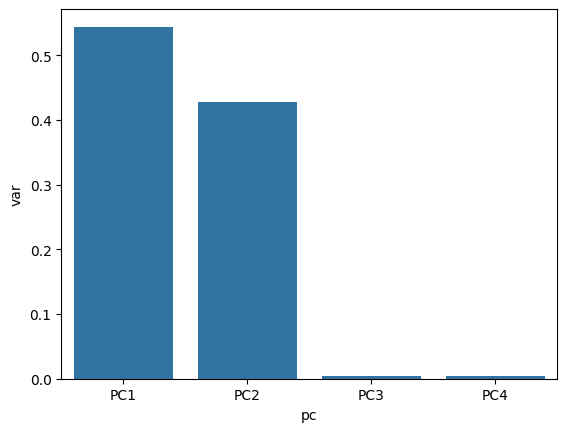

In [156]:
df=pd.DataFrame(
    {'var':pca.explained_variance_ratio_,
     'pc':['PC1','PC2','PC3','PC4']}
)
sb.barplot(x='pc',data=df,y='var')
plt.show()

In [157]:
iris=sb.load_dataset('iris')
x=iris.drop('species',axis=1)
y=iris['species']

In [158]:
pca = PCA(n_components=3)
print('before',x.shape)
print(y)

before (150, 4)
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [159]:
x_pca=pca.fit_transform(x)

In [160]:
print('after',x_pca.shape)
x_pca

after (150, 3)


array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [161]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [162]:
x['PCA1']=x_pca[:,0]
x['PCA2']=x_pca[:,1]
x['PCA3']=x_pca[:,2]

In [163]:
x

,sepal_length,sepal_width,petal_length,petal_width,PCA1,PCA2,PCA3
0,5.1,3.5,1.4,0.2,-2.684126,0.319397,-0.027915
1,4.9,3.0,1.4,0.2,-2.714142,-0.177001,-0.210464
2,4.7,3.2,1.3,0.2,-2.888991,-0.144949,0.017900
3,4.6,3.1,1.5,0.2,-2.745343,-0.318299,0.031559
4,5.0,3.6,1.4,0.2,-2.728717,0.326755,0.090079
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.944110,0.187532,0.177825
146,6.3,2.5,5.0,1.9,1.527167,-0.375317,-0.121898
147,6.5,3.0,5.2,2.0,1.764346,0.078859,0.130482
148,6.2,3.4,5.4,2.3,1.900942,0.116628,0.723252


In [164]:
X_train,x_test,Y_train,y_test = train_test_split(x, y, random_state=1)

In [165]:
#Select PCA column
X_train = X_train.loc[:,['PCA1','PCA2','PCA3']]
x_test = x_test.loc[:,['PCA1','PCA2','PCA3']]

In [166]:
model = GaussianNB()

In [167]:
model.fit(X_train,Y_train)

GaussianNB()

In [168]:
y_pred = model.predict(x_test)

In [169]:
print("accuracy_score :",accuracy_score(y_test,y_pred))

accuracy_score : 0.9473684210526315
